## Shortest Path Problems

When you surf the web, send an email, or log in to a laboratory computer from another location on campus a lot of work is going on behind the scenes to get the information on your computer transferred to another computer.

<img src="images/internet.png">

The figure above shows you a high-level overview of how communication on the Internet works. When you use your browser to request a web page from a server, the request must travel over your local area network and out onto the Internet through a router. The request travels over the Internet and eventually arrives at a router for the local area network where the server is located. The web page you requested then travels back through the same routers to get to your browser.

Inside the cloud labelled “Internet” are additional routers. The job of all of these routers is to work together to get your information from place to place. So if you run the `traceroute` command at different times of the day, you are likely to see that your information flows through different routers at different times.

By this time it will not surprise you to learn that we can represent the network of routers as a graph with weighted edges.

<img src="images/routeGraph.png">

Figure above shows a small example of a weighted graph that represents the interconnection of routers in the Internet.

> The problem that we want to solve is to find the path with the smallest total weight along which to route any given message.

This problem should sound familiar because it is similar to the problem we solved using a breadth first search, except that here we are concerned with the total weight of the path rather than the number of hops in the path. It should be noted that if all the weights are equal, the problem is the same.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 6)

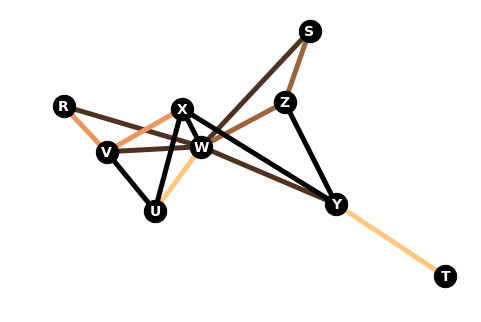

In [2]:
df = pd.DataFrame({
    'from':    ['R','R','S','S','T','U','U','U','V','V','W','W','W','X','Y'],
    'to':      ['V','W','W','Z','Y','V','W','X','X','W','X','Y','Z','Y','Z'],
    'weight': [ 4,  2,  1,  4,  2,  2,  5,  1,  2,  3,  3,  1,  5,  1,  1 ]
})

G = nx.from_pandas_edgelist(df,
                            source='from',
                            target='to',
                            edge_attr=['weight']
                           )
nx.draw(G,
        with_labels=True,
        node_color='black',
        node_size=500,
        edge_color=df['weight'],
        width=5,
        font_size=14,
        font_color="white",
        font_weight="bold",
        edge_cmap=plt.cm.copper
       )

Returns a list of cycles which form a basis for cycles of G.

In [3]:
nx.cycle_basis(G, root='U')

[['V', 'X', 'U'],
 ['W', 'X', 'U'],
 ['W', 'Y', 'X'],
 ['W', 'Z', 'Y'],
 ['W', 'S', 'Z'],
 ['V', 'W', 'U'],
 ['V', 'R', 'W']]

## Shortest path

Calculate the _shortest path_ from each node to each other.

In [4]:
list(nx.shortest_path_length(G))

[('R',
  {'R': 0, 'V': 1, 'W': 1, 'U': 2, 'X': 2, 'S': 2, 'Y': 2, 'Z': 2, 'T': 3}),
 ('V',
  {'V': 0, 'R': 1, 'U': 1, 'X': 1, 'W': 1, 'Y': 2, 'S': 2, 'Z': 2, 'T': 3}),
 ('W',
  {'W': 0, 'R': 1, 'S': 1, 'U': 1, 'V': 1, 'X': 1, 'Y': 1, 'Z': 1, 'T': 2}),
 ('S',
  {'S': 0, 'W': 1, 'Z': 1, 'R': 2, 'U': 2, 'V': 2, 'X': 2, 'Y': 2, 'T': 3}),
 ('Z',
  {'Z': 0, 'S': 1, 'W': 1, 'Y': 1, 'R': 2, 'U': 2, 'V': 2, 'X': 2, 'T': 2}),
 ('T',
  {'T': 0, 'Y': 1, 'W': 2, 'X': 2, 'Z': 2, 'R': 3, 'S': 3, 'U': 3, 'V': 3}),
 ('Y',
  {'Y': 0, 'T': 1, 'W': 1, 'X': 1, 'Z': 1, 'R': 2, 'S': 2, 'U': 2, 'V': 2}),
 ('U',
  {'U': 0, 'V': 1, 'W': 1, 'X': 1, 'R': 2, 'S': 2, 'Y': 2, 'Z': 2, 'T': 3}),
 ('X',
  {'X': 0, 'U': 1, 'V': 1, 'W': 1, 'Y': 1, 'R': 2, 'S': 2, 'Z': 2, 'T': 2})]

In [5]:
nx.average_shortest_path_length(G)

1.6944444444444444

Now we'll use **Dijkstra’s Method** to compute the **shortest weighted path between** two nodes in a graph.

In [6]:
nx.dijkstra_path(G, 'T', 'R')

['T', 'Y', 'W', 'R']

In [7]:
nx.dijkstra_path(G, 'U', 'Z')

['U', 'X', 'Y', 'Z']

## Critical path

Now we are goint to calculate the **longest path** of our graph by finding a simple path of maximum length in our graph.

To do that we'll use **Dijkstra’s Method** with **inverse weights**.

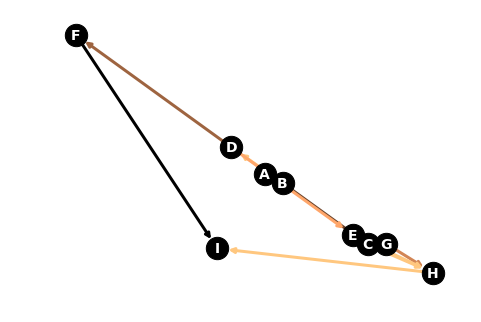

In [8]:
weights = [ 4,  2,  6,  4,  6,  5,  3,  4,  6,  0,  6,  0 ]

df = pd.DataFrame({
    'from':    ['A','B','B','C','C','D','D','E','E','F','G','H'],
    'to':      ['B','C','D','G','H','E','F','G','H','I','H','I'],
    'weight': weights,
    'inverse_weight': -np.array(weights)
})

G = nx.from_pandas_edgelist(df,
                            source='from',
                            target='to',
                            edge_attr=['weight', 'inverse_weight'],
                            create_using=nx.DiGraph()
                           )

nx.draw(G,
        with_labels=True,
        arrows=True,
        node_color='black',
        node_size=500,
        edge_color=df['weight'],
        width=3,
        font_size=14,
        font_color="white",
        font_weight="bold",
        edge_cmap=plt.cm.copper
       )

That graph doesn't have any cycle.

In [9]:
len(list(nx.simple_cycles(G)))

0

In [10]:
list(nx.shortest_path_length(G))

[('A',
  {'A': 0, 'B': 1, 'C': 2, 'D': 2, 'G': 3, 'H': 3, 'E': 3, 'F': 3, 'I': 4}),
 ('B', {'B': 0, 'C': 1, 'D': 1, 'G': 2, 'H': 2, 'E': 2, 'F': 2, 'I': 3}),
 ('C', {'C': 0, 'G': 1, 'H': 1, 'I': 2}),
 ('D', {'D': 0, 'E': 1, 'F': 1, 'G': 2, 'H': 2, 'I': 2}),
 ('G', {'G': 0, 'H': 1, 'I': 2}),
 ('H', {'H': 0, 'I': 1}),
 ('E', {'E': 0, 'G': 1, 'H': 1, 'I': 2}),
 ('F', {'F': 0, 'I': 1}),
 ('I', {'I': 0})]

In [11]:
nx.average_shortest_path_length(G)

0.7638888888888888

Now we'll use **Dijkstra’s Method** to compute the **shortest weighted path** between two nodes in a graph.

In [12]:
nx.dijkstra_path(G,
                 source='A',
                 target='I',
                 weight='weight')

['A', 'B', 'C', 'H', 'I']

Now we'll use **Dijkstra’s Method** to compute the **critical _(longest)_ weighted path** between two nodes in a graph, using **inverse weights**.

In [13]:
nx.dijkstra_path(G,
                 source='A',
                 target='I',
                 weight='inverse_weight')

['A', 'B', 'D', 'E', 'H', 'I']